In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
from pandas import DataFrame
from matplotlib import pyplot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pandas.plotting import autocorrelation_plot

/Users/ambikabohra/anaconda2/lib/python2.7/site-packages/numexpr/cpuinfo.py:76: UserWarning: [Errno 2] No such file or directory
  stacklevel=stacklevel + 1):
/Users/ambikabohra/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [13]:
df = pd.read_csv("groupeddf.csv")
df = df.dropna()

uniqueVals = df["Code"].unique()  
len(uniqueVals)
df=df.set_index("Code") #for loc function, creted index

In [ ]:
#for daily basis
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

In [14]:
def arima_model(train, test):
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(6,1 ,0))
        model_fit = model.fit(disp=0)
        #print(model_fit.summary())
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat[0])
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    return predictions

3IINFOTECH


/Users/ambikabohra/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


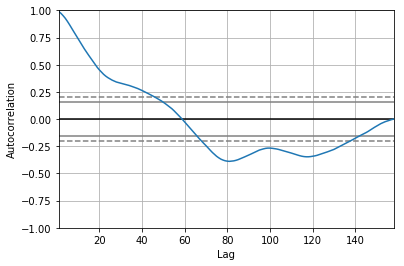

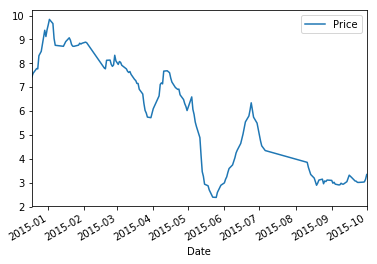

predicted=3.182502, expected=3.200000
predicted=3.090994, expected=3.050000
predicted=2.991872, expected=2.900000
predicted=2.806264, expected=2.991667
predicted=2.968540, expected=3.117081
predicted=3.145262, expected=3.155341
predicted=3.156812, expected=2.962581
predicted=2.926559, expected=3.079375
predicted=3.118451, expected=3.054412
predicted=3.053996, expected=3.117925
predicted=3.060620, expected=3.105376
predicted=3.118606, expected=3.102899
predicted=3.104299, expected=2.985476
predicted=2.935626, expected=3.025000
predicted=3.005999, expected=2.946032
predicted=2.909353, expected=2.913966
predicted=2.852393, expected=2.917961
predicted=2.911047, expected=2.984925
predicted=2.990256, expected=2.949425
predicted=2.924400, expected=2.945588
predicted=2.934126, expected=3.050000
predicted=3.089134, expected=3.190523
predicted=3.231659, expected=3.322321
predicted=3.364718, expected=3.228814
predicted=3.233278, expected=3.079558
predicted=3.034649, expected=3.068750
predicted=3.

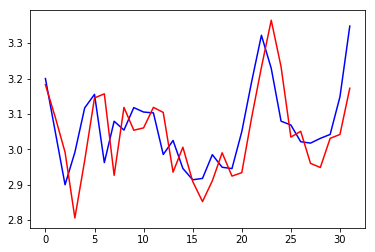

8KMILES


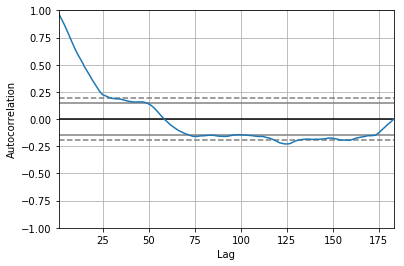

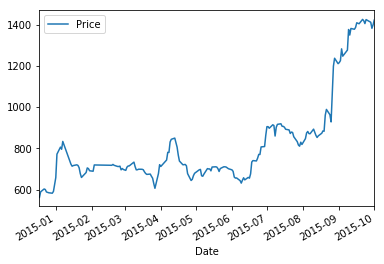

predicted=868.453297, expected=893.784842
predicted=900.799857, expected=879.053614
predicted=880.227442, expected=863.428662
predicted=863.845401, expected=853.199606
predicted=847.362117, expected=860.892405
predicted=865.439900, expected=873.742188
predicted=880.595730, expected=885.039713
predicted=890.738460, expected=883.451361
predicted=883.785404, expected=961.241967
predicted=980.132566, expected=989.514373
predicted=996.470180, expected=963.833832
predicted=967.113836, expected=928.771451
predicted=914.639882, expected=1061.433891
predicted=1085.943404, expected=1199.757790
predicted=1227.434673, expected=1238.074865
predicted=1242.295862, expected=1211.706688
predicted=1203.494995, expected=1216.950000
predicted=1238.698209, expected=1226.471739
predicted=1238.322055, expected=1283.745958
predicted=1313.308114, expected=1248.156973
predicted=1229.603981, expected=1270.722516
predicted=1286.193513, expected=1277.656860
predicted=1283.056178, expected=1377.645455
predicted=140

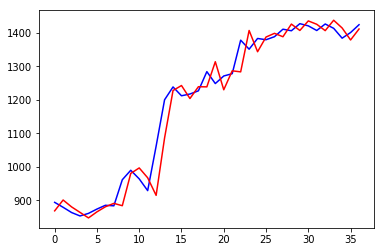

ABAN


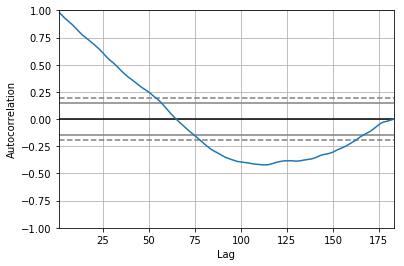

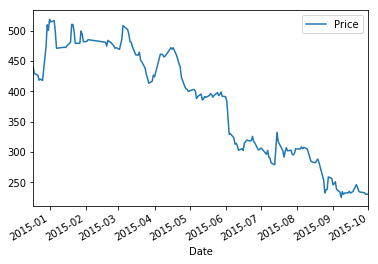

predicted=305.870191, expected=304.750938
predicted=302.327128, expected=298.009867
predicted=295.953464, expected=290.777005
predicted=287.155800, expected=285.146196
predicted=283.931278, expected=283.835600
predicted=282.669881, expected=282.151333
predicted=281.613350, expected=286.193449
predicted=288.117683, expected=288.368000
predicted=288.912713, expected=282.294400
predicted=280.948598, expected=275.203067
predicted=272.602157, expected=253.543867
predicted=247.067519, expected=232.363733
predicted=226.553189, expected=237.590133
predicted=238.900006, expected=238.372861
predicted=239.417204, expected=258.864933
predicted=267.139502, expected=256.295733
predicted=255.764783, expected=245.727600
predicted=246.973199, expected=247.576400
predicted=243.708082, expected=250.883200
predicted=251.080846, expected=238.516533
predicted=230.664224, expected=233.631200
predicted=232.291503, expected=225.058400
predicted=223.210380, expected=234.569600
predicted=237.624649, expected=230

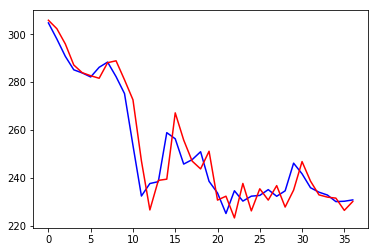

ABB


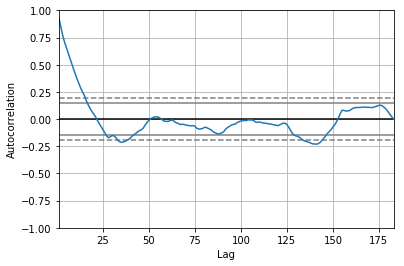

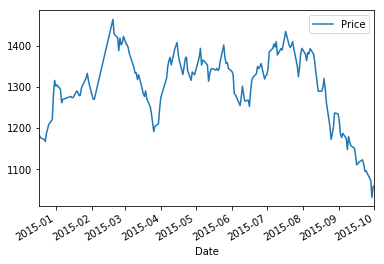

predicted=1397.911359, expected=1379.345575
predicted=1373.589368, expected=1360.089828
predicted=1361.880271, expected=1333.234201
predicted=1332.549913, expected=1310.313857
predicted=1313.692993, expected=1288.995105
predicted=1291.136649, expected=1289.318577
predicted=1294.495263, expected=1298.806653
predicted=1301.334053, expected=1319.974593
predicted=1323.555522, expected=1294.136006
predicted=1285.775800, expected=1261.354545
predicted=1259.179480, expected=1203.693079
predicted=1196.679959, expected=1172.587333
predicted=1178.721739, expected=1185.603812
predicted=1195.498220, expected=1202.011624
predicted=1206.462391, expected=1236.619520
predicted=1241.211919, expected=1234.337847
predicted=1223.579195, expected=1219.108519
predicted=1213.810994, expected=1185.166857
predicted=1178.043633, expected=1176.940936
predicted=1183.086840, expected=1187.359223
predicted=1194.758907, expected=1174.873264
predicted=1174.245372, expected=1148.015698
predicted=1142.863939, expected=

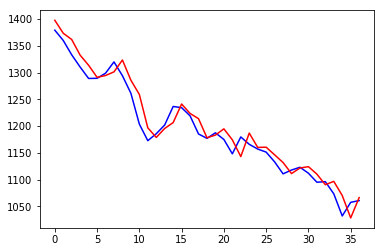

ABBOTINDIA


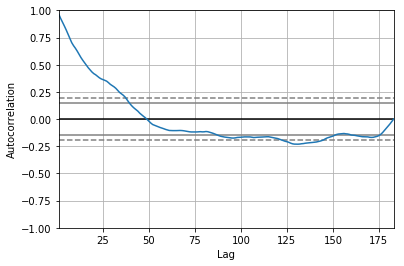

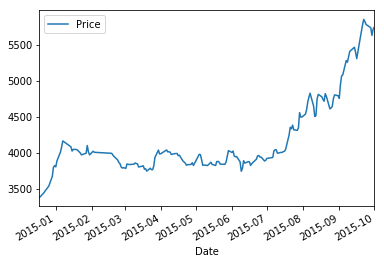

predicted=4855.432379, expected=4654.014350
predicted=4620.020324, expected=4509.503641
predicted=4511.872070, expected=4520.081818
predicted=4563.207318, expected=4753.152372
predicted=4838.404014, expected=4816.914130
predicted=4789.647466, expected=4783.826744
predicted=4728.133321, expected=4748.433735
predicted=4742.743995, expected=4721.127099
predicted=4738.663483, expected=4826.435112
predicted=4901.780135, expected=4785.658084
predicted=4764.570923, expected=4614.366071
predicted=4571.626425, expected=4628.182486
predicted=4679.283623, expected=4649.094481
predicted=4668.202661, expected=4758.117133
predicted=4786.451980, expected=4809.200000
predicted=4787.382451, expected=4798.324299
predicted=4781.069678, expected=4761.653125
predicted=4762.759625, expected=4950.656360
predicted=5029.084625, expected=5073.010606
predicted=5084.377547, expected=5087.129317
predicted=5064.020224, expected=5287.434375
predicted=5350.869809, expected=5263.027023
predicted=5244.472698, expected=

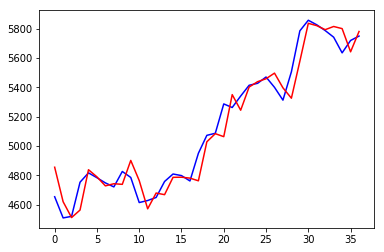

ABIRLANUVO


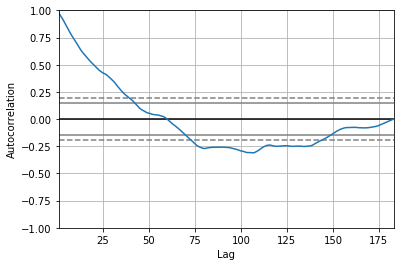

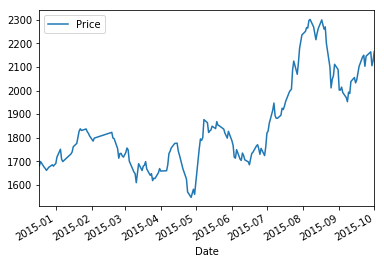

predicted=2300.819891, expected=2270.193296
predicted=2271.749060, expected=2244.264572
predicted=2246.549129, expected=2216.019200
predicted=2206.188326, expected=2242.606356
predicted=2240.154847, expected=2263.412701
predicted=2264.183172, expected=2299.858400
predicted=2318.291946, expected=2278.899863
predicted=2287.730339, expected=2260.747110
predicted=2270.024818, expected=2270.056933
predicted=2269.818142, expected=2199.520699
predicted=2180.381411, expected=2100.287333
predicted=2086.505127, expected=2011.760400
predicted=1986.643862, expected=2047.839200
predicted=2042.583834, expected=2063.058933
predicted=2053.261534, expected=2111.767200
predicted=2149.498807, expected=2089.394667
predicted=2107.966973, expected=2002.247861
predicted=1992.415941, expected=2002.757333
predicted=2008.838316, expected=2015.041600
predicted=2005.015115, expected=1992.291600
predicted=1984.421583, expected=1970.770933
predicted=1977.440552, expected=1953.197467
predicted=1954.111828, expected=

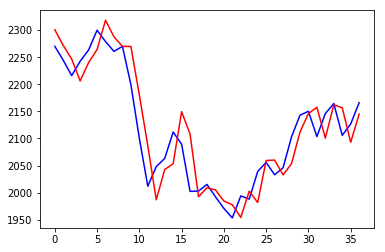

ACC


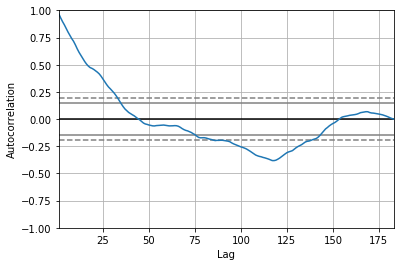

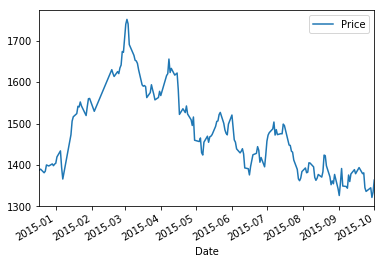

predicted=1402.403579, expected=1395.422865
predicted=1394.940056, expected=1369.965200
predicted=1370.235547, expected=1362.904400
predicted=1362.876964, expected=1367.875829
predicted=1369.102670, expected=1377.007067
predicted=1375.570049, expected=1370.673214
predicted=1369.360118, expected=1383.712845
predicted=1384.942998, expected=1423.901206
predicted=1427.882953, expected=1422.544800
predicted=1419.055086, expected=1397.939008
predicted=1396.200910, expected=1371.343600
predicted=1373.629311, expected=1352.299733
predicted=1350.935036, expected=1361.500800
predicted=1363.118713, expected=1354.547333
predicted=1352.674931, expected=1377.089178
predicted=1378.671656, expected=1342.313333
predicted=1339.455100, expected=1326.164706
predicted=1323.747369, expected=1356.183600
predicted=1363.510984, expected=1391.467600
predicted=1389.341974, expected=1349.083600
predicted=1341.200955, expected=1347.954396
predicted=1352.735632, expected=1343.830965
predicted=1347.310332, expected=

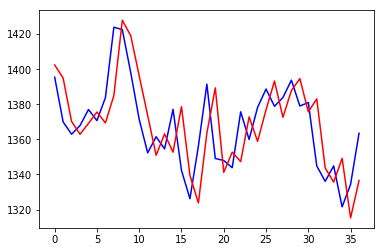

ADANIENT


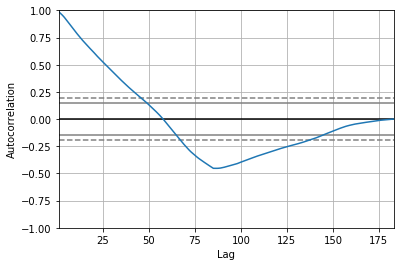

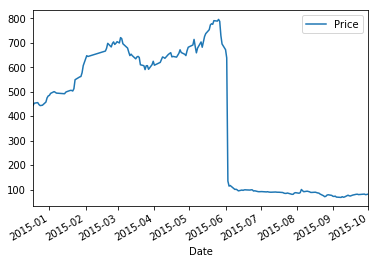

predicted=90.422994, expected=93.510533
predicted=92.934502, expected=92.455467
predicted=89.674953, expected=90.964133
predicted=88.685333, expected=88.421332
predicted=86.709064, expected=88.424133
predicted=86.522834, expected=89.279867
predicted=87.332677, expected=87.629067
predicted=85.595994, expected=86.255200
predicted=84.557937, expected=85.593467
predicted=83.858315, expected=81.881867
predicted=79.533479, expected=74.748267
predicted=72.038572, expected=70.868533
predicted=68.285159, expected=72.757333
predicted=70.268760, expected=77.626267
predicted=75.554108, expected=78.820400
predicted=77.347112, expected=76.266933
predicted=75.187940, expected=72.759333
predicted=71.379293, expected=71.936096
predicted=70.002513, expected=73.281467
predicted=71.169549, expected=69.321200
predicted=66.899056, expected=68.529144
predicted=66.877285, expected=67.947733
predicted=66.167690, expected=71.118667
predicted=69.413122, expected=68.655851
predicted=66.789275, expected=69.839439


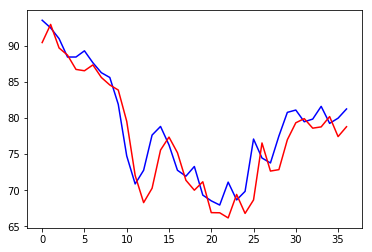

ADANIPORTS


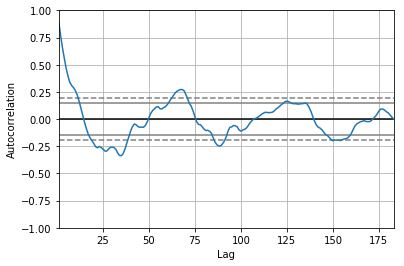

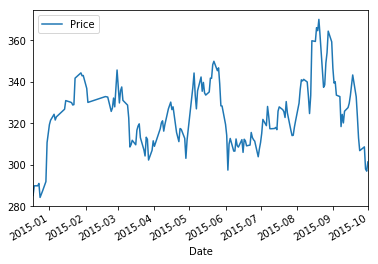

predicted=341.341611, expected=339.986667
predicted=340.081705, expected=333.247200
predicted=333.276459, expected=324.768717
predicted=325.180689, expected=333.444022
predicted=335.170494, expected=359.851467
predicted=362.375767, expected=359.525467
predicted=356.789639, expected=366.156933
predicted=367.775775, expected=364.701333
predicted=361.599755, expected=370.149067
predicted=369.813839, expected=362.432800
predicted=362.262978, expected=337.417067
predicted=335.998018, expected=338.550267
predicted=341.643528, expected=349.133200
predicted=350.662790, expected=354.102800
predicted=355.332277, expected=364.485333
predicted=368.062478, expected=359.334000
predicted=358.355654, expected=346.647467
predicted=345.206113, expected=339.474667
predicted=339.521823, expected=340.128533
predicted=341.925862, expected=333.649867
predicted=334.806687, expected=332.935771
predicted=336.233780, expected=318.486133
predicted=317.750749, expected=324.344681
predicted=328.041815, expected=320

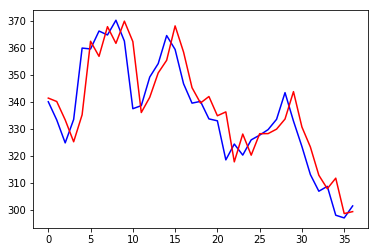

ADANIPOWER


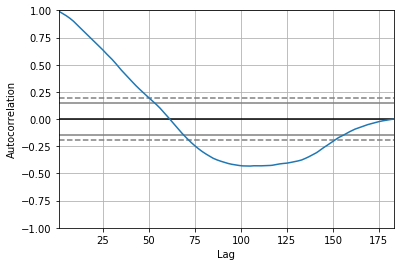

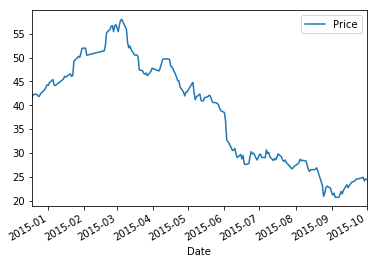

predicted=28.640294, expected=28.352533
predicted=28.258038, expected=27.406283
predicted=27.122903, expected=26.581467
predicted=26.351172, expected=26.159918
predicted=25.985556, expected=26.572000
predicted=26.533463, expected=26.560561
predicted=26.300886, expected=26.619786
predicted=26.570535, expected=26.951482
predicted=27.002448, expected=26.386595
predicted=26.164720, expected=25.556836
predicted=25.347599, expected=23.285600
predicted=22.599676, expected=20.976400
predicted=20.327705, expected=21.607353
predicted=21.733056, expected=22.778933
predicted=22.666158, expected=23.099067
predicted=22.826109, expected=22.693867
predicted=22.485736, expected=21.685160
predicted=21.492471, expected=21.231855
predicted=21.202569, expected=21.668733
predicted=21.718554, expected=20.760267
predicted=20.219719, expected=20.754800
predicted=20.766693, expected=21.312400
predicted=21.337835, expected=21.987467
predicted=22.058984, expected=21.477285
predicted=21.107350, expected=22.230946


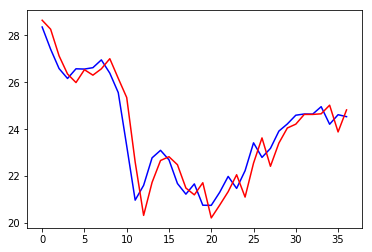

In [19]:
for company in uniqueVals[:10]:
    data=(df.loc[company,:]).reset_index()
    data['Price'] = data['Close']
    Quantity_date = data[['Price','Date']]
    Quantity_date.index = Quantity_date['Date'].map(lambda x: parser(x))
    Quantity_date['Price'] = Quantity_date['Price'].map(lambda x: float(x))
    Quantity_date = Quantity_date.fillna(Quantity_date.bfill())
    Quantity_date = Quantity_date.drop(['Date'],axis =1)
    autocorrelation_plot(Quantity_date)
    print(company)
    plt.show()
    
    Quantity_date.plot()
    plt.show()
    
    quantity = Quantity_date.values
    size = int(len(quantity) * 0.80)
    train, test = quantity[0:size], quantity[size:len(quantity)]
    #fit in model
    predictions = arima_model(train, test)
    #rmse calculation
    error = math.sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % error)
    #plot graph
    plt.plot(test,color='blue' )
    plt.plot(predictions, color='red')
    plt.show()

In [20]:
#for monthly basis
def parserM(x):
    return datetime.strptime(x, '%Y-%m')

In [ ]:
for company in uniqueVals[:10]:
    data1=(df.loc[company,:]).reset_index()
    print "Company name : ",company
    data1['Price'] = data1['Close']
    data1['Date'] = data1['Date'].map(lambda x: str(x)[:7])
    Quantity_date1 = data[['Price','Date']]
    Quantity_date_count1=Quantity_date1.groupby(['Date'])['Price'].aggregate('mean').reset_index().sort_values(by='Date', ascending=0)
    date=list(Quantity_date_count1['Date'])
    quantity=list(Quantity_date_count1['Price'])
    date_quantity = pd.DataFrame({'dates': date, 'quantity':quantity})
    date_quantity.index = date_quantity['dates'].map(lambda x: parserM(x))
    date_quantity['quantity'] = date_quantity['quantity'].map(lambda x: float(x))
    date_quantity = date_quantity.fillna(date_quantity.bfill())
    date_quantity = date_quantity['quantity'].resample('MS').mean()
    #plot autosorelation plot
    autocorrelation_plot(date_quantity)
    plt.show()
    
    #date and prices plot
    date_quantity.plot()
    plt.show()
    #train and test data
    quantity = date_quantity.values
    size = int(len(quantity) * 0.66)
    train, test = quantity[0:size], quantity[size:len(quantity)]
    #fit in model
    predictions = arima_model(train, test)
    #rmse calculation
    error = math.sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % error)
    #plot graph
    plt.plot(test,color='blue' )
    plt.plot(predictions, color='red')
    plt.show()